<a href="https://colab.research.google.com/github/Rdcornejov/Data-Mining-Data-Analysis/blob/main/02_Identificaci%C3%B3n_y_tratamiento_de_valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación y tratamiento de valores atípicos

### Docente: M.Sc. Richard Fernández

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('bupa.csv',sep=";")

In [3]:
data.shape

(345, 7)

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [5]:
data.dtypes

,0
V1,int64
V2,int64
V3,int64
V4,int64
V5,int64
V6,float64
V7,int64


In [6]:
data['V7'] = data.V7.astype(object)

In [7]:
data.dtypes

,0
V1,int64
V2,int64
V3,int64
V4,int64
V5,int64
V6,float64
V7,object


In [10]:
data_X = data.drop('V7', axis = 1)
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


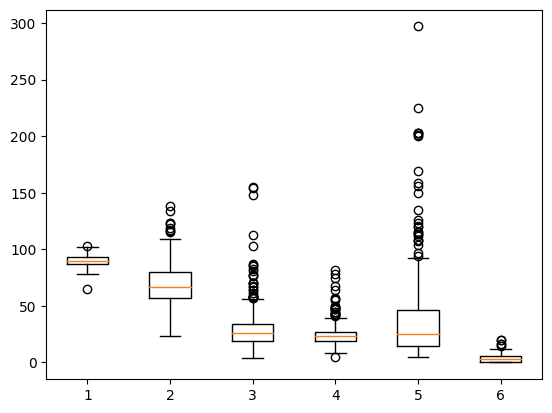

In [11]:
#1.Boxplot
plt.boxplot(data_X)
plt.show()

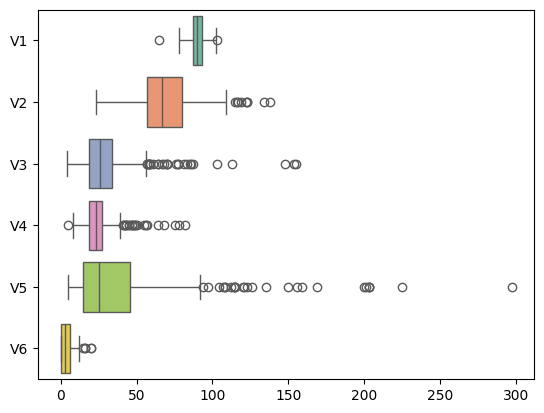

In [12]:
sns.boxplot(data=data_X, orient="h", palette="Set2")
plt.show()

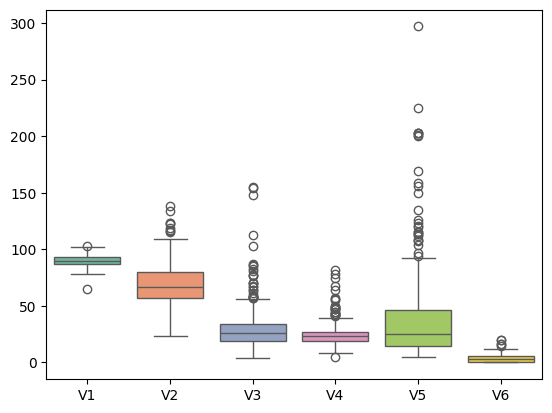

In [13]:
sns.boxplot(data=data_X, orient="v", palette="Set2")
plt.show()

Metodo Z_Score: mide cuantas desviaciones estandar está alejado de la media. Aqui le pusieron 3 veces alejado como maximo.

In [21]:
#2.Outlier

def z_score_method(df, variable_name):
  columns = df.columns
  z = np.abs(stats.zscore(df[variable_name]))
  threshold = 3
  outlier = []
  index=0

  for i, v in enumerate(z):
      if v > threshold:
          outlier.append(i)
      else:
          continue
  return outlier

In [27]:
outlier_z = z_score_method(df=data_X,variable_name='V1')
print(outlier_z)

[223]


In [28]:
outlier_z = z_score_method(df=data_X,variable_name='V2')
print(outlier_z)

[122, 334]


In [29]:
outlier_z = z_score_method(df=data_X,variable_name='V3')
print(outlier_z)

[35, 133, 232, 299, 316]


In [30]:
outlier_z = z_score_method(df=data_X,variable_name='V4')
print(outlier_z)

[35, 110, 185, 232, 285, 299, 316, 322]


In [31]:
outlier_z = z_score_method(df=data_X,variable_name='V5')
print(outlier_z)

[76, 84, 114, 178, 189, 232, 315, 322, 330, 341]


In [33]:
outlier_z = z_score_method(df=data_X,variable_name='V6')
print(outlier_z)

[188, 189, 342, 343, 344]


## Tratamiento 1

Las variables se aproximan a una distribución normal

In [35]:
data_X = data.drop('V7', axis= 1)
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


## Prueba de normalidad
- Ho: las variables se aproximan a una distribución normal
- Ha: las variables NO se aproximan a una distribución normal


- Si pvalue < 5% => Se rechaza la Ho, a un nivel de confianza de 95%, la variable no se aproxima a una distribución normal

- Si pvalue > 5% => No se rechaza la Ho, a un nivel de confianza de 95%, la variable se aproxima a una distribución normal

In [36]:
stats.shapiro(data_X.V1)

ShapiroResult(statistic=0.9721210720214322, pvalue=3.3408291692175986e-06)

In [37]:
stats.shapiro(data_X.V2)

ShapiroResult(statistic=0.9662434242707602, pvalue=3.6045510771686095e-07)

In [38]:
stats.shapiro(data_X.V3)

ShapiroResult(statistic=0.7289102992482928, pvalue=2.5798791941871481e-23)

In [39]:
stats.shapiro(data_X.V4)

ShapiroResult(statistic=0.8149622094153431, pvalue=1.4028839075597481e-19)

In [40]:
stats.shapiro(data_X.V5)

ShapiroResult(statistic=0.6839380588671681, pvalue=6.48073466081761e-25)

In [41]:
stats.shapiro(data_X.V6)

ShapiroResult(statistic=0.8354936513596574, pvalue=1.6864816314857383e-18)

Con un nivel de confianza del 95%, se rechazan las Ho para V1, V2, V3, V4, V5 y V6

las variables no se aproximan a una distribución normal

Sólo se usará este tratamiento para fines explicativos, se debe de usar el "Tratamiento 2"

In [42]:
#Encontrando los valores límite
print("Más alto permitido",data_X['V1'].mean() + 3*data_X['V1'].std())

Más alto permitido 103.50370821474814


In [43]:
print("Lo más bajo permitido",data_X['V1'].mean() - 3*data_X['V1'].std())

Lo más bajo permitido 76.81513236496201


In [44]:
#Limitación de valores atípicos
upper_limit = data_X['V1'].mean() + 3*data_X['V1'].std()
lower_limit = data_X['V1'].mean() - 3*data_X['V1'].std()

In [45]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
223,65,63,19,20,14,0.5


In [46]:
data_X.shape

(345, 6)

In [47]:
#Recorte de valores atípicos
new_df = data_X[(data_X['V1'] < upper_limit) & (data_X['V1'] > lower_limit)]
new_df.shape

(344, 6)

In [48]:
new_df.shape[0]/data_X.shape[0]*100

99.71014492753623

Esta es donde yo decido elegir los limites

In [49]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['V1']<lower_limit,
        lower_limit,
        new_df_cap['V1']
    )
)

In [50]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [51]:
new_df_cap.shape

(345, 6)

<ipython-input-52-ed3f4961261b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['V1'])
<ipython-input-52-ed3f4961261b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V1'])


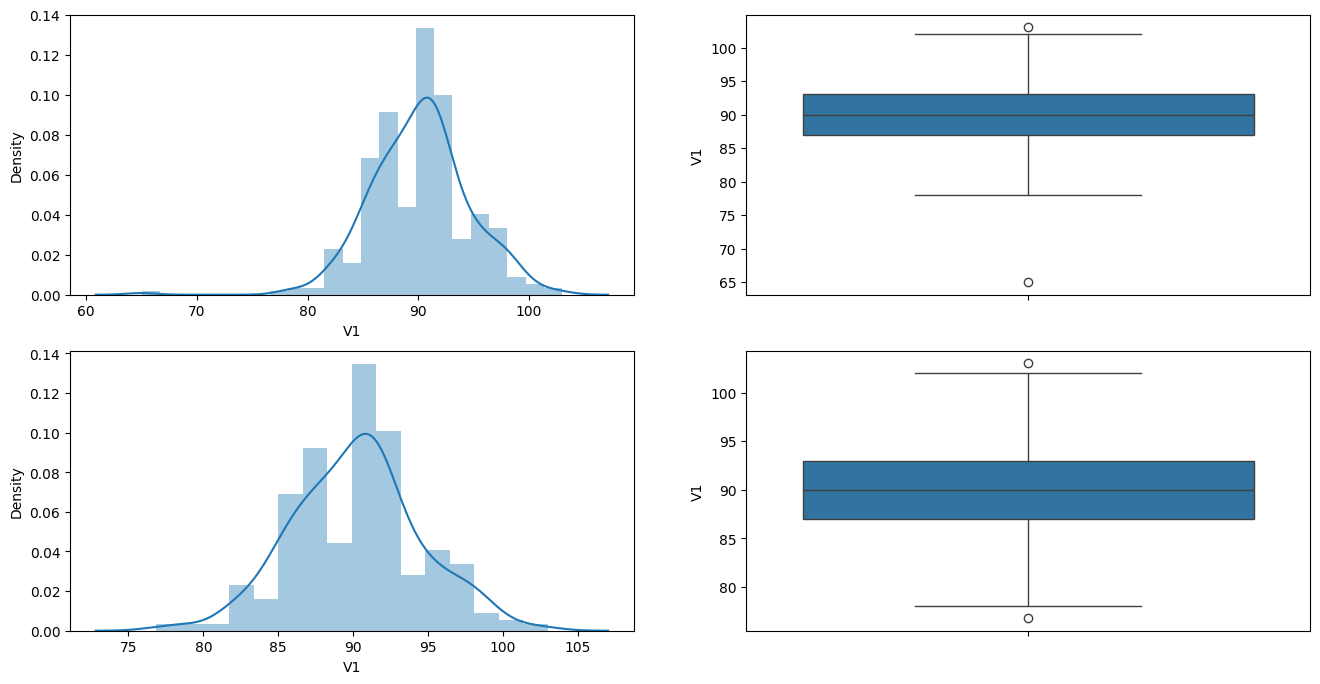

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'])
plt.show()

## 2.Tratamiento 2
###  Las variables no se aproximan a una distribución normal

In [54]:
data_X = data.drop('V7', axis= 1)
data_X.head()

,V1,V2,V3,V4,V5,V6
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [55]:
#Encontrando RIC
percentile25 = data_X['V1'].quantile(0.25) #cuartil 1
percentile75 = data_X['V1'].quantile(0.75) #cuartil 3
ric = percentile75 - percentile25

ric = rango inter cuartil


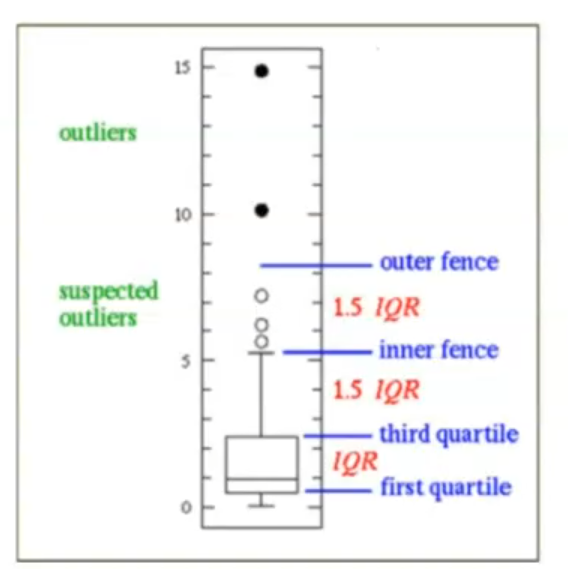

In [56]:
#Limitación de valores atípicos
upper_limit = percentile75 + 1.5 * ric
lower_limit = percentile25 - 1.5 * ric

In [57]:
print(upper_limit)

102.0


In [58]:
print(lower_limit)

78.0


In [59]:
#Encontrando los valores atípicos
data_X[(data_X['V1'] > upper_limit) | (data_X['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6
68,103,75,19,30,13,1.0
223,65,63,19,20,14,0.5


In [60]:
#Recorte de valores atípicos
new_df = data_X[data_X['V1'] < upper_limit]
new_df.shape

(343, 6)

In [70]:
#impacto
new_df.shape[0]/data_X.shape[0]*100

99.42028985507247

reemplazar por los limites en vez de borrarlos para no borrar datos, es una opcion

In [71]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['V1'] = np.where(
    new_df_cap['V1'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['V1'] < lower_limit,
        lower_limit,
        new_df_cap['V1']
    )
)

In [72]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['V1'] > upper_limit) | (new_df_cap['V1'] < lower_limit)]

,V1,V2,V3,V4,V5,V6


In [69]:
new_df_cap.shape

(345, 6)

In [74]:
new_df_cap.shape[0]/data_X.shape[0]*100

100.0

<ipython-input-73-ed3f4961261b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['V1'])
<ipython-input-73-ed3f4961261b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['V1'])


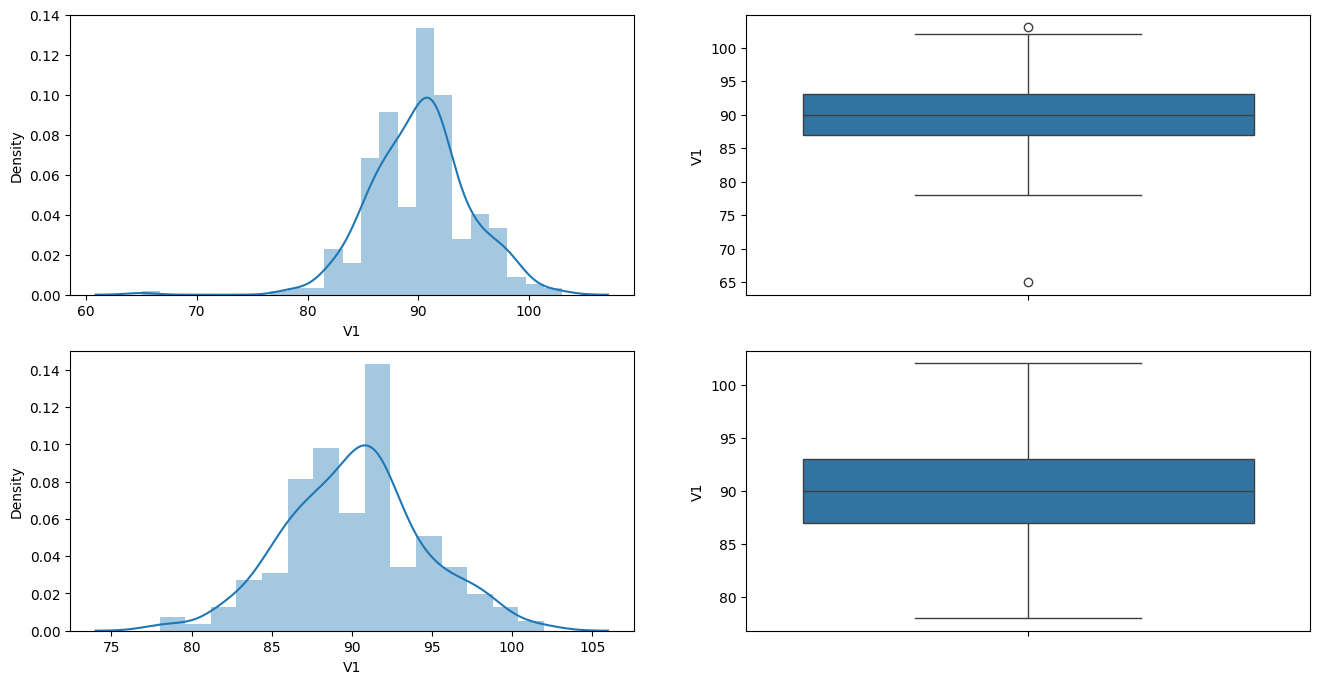

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['V1'])
plt.subplot(2,2,2)
sns.boxplot(data_X['V1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['V1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['V1'])
plt.show()